<a href="https://colab.research.google.com/github/sarahmagdi/ITI_ML1_labs/blob/main/perceptron_algorithm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 13.30 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/perceptron_algorithm/machine_learning_1/perceptron_algorithm/machine_learning_1/perceptron_algorithm/machine_learning_1/perceptron_algorithm


In [ ]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [ ]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

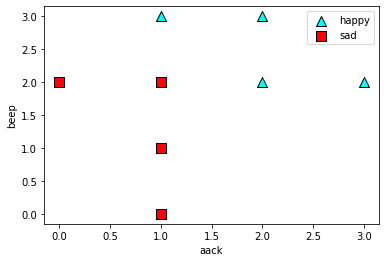

In [ ]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [ ]:
def step(x):
    ## TODO ##
    # implement step function
    if x>0:
      output=1
    else:
      output=0

    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output=(weights[0]*features[0])+(weights[1]*features[1])+bias

    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output=step(score(weights, bias, features))

    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    if (label-prediction(weights, bias, features) )==0:
      output=0
    else:
      output=abs(score(weights, bias, features))




    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [ ]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    """
    bias=bias+(learning_rate*(label-error(weights, bias, features, label)))
    weights[0]=weights[0]+(learning_rate*(label-error(weights, bias, features, label))*features[0])
    weights[1]=weights[1]+(learning_rate*(label-error(weights, bias, features, label))*features[1])
    
    """
    bias=bias+(learning_rate*(label-prediction(weights, bias, features)))
    weights[0]=weights[0]+(learning_rate*(label-prediction(weights, bias, features))*features[0])
    weights[1]=weights[1]+(learning_rate*(label-prediction(weights, bias, features))*features[1])


    return weights, bias

### Running the perceptron algorithm

In [ ]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs 
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    for i in range(epochs):
      w=random.choice(range(0, len(features)-1))
      x_x=features[w]
      y_y= labels[w]
      e=mean_perceptron_error(weights, bias,features, labels)
      errors.append(e)
      weights, bias=perceptron_trick(weights, bias, x_x,y_y, learning_rate = 0.01)


    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    
    print(len(errors))
    plt.scatter(range(epochs), errors)
   
    return weights, bias

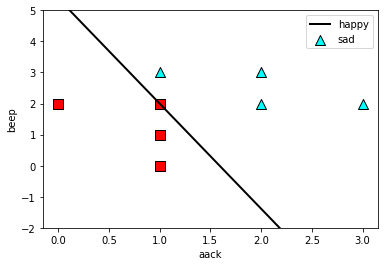

200


([0.4399999999999995, 0.1299999999999994], -0.7000000000000004)

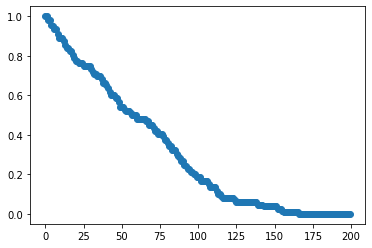

In [ ]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [ ]:
from sklearn.linear_model import Perceptron
## TODO ##
# Use SKlearn to train perceptron algorithm
clf=Perceptron(tol=1e-3, random_state=0)
clf.fit(features, labels)

In [ ]:
clf.score(features, labels)

In [ ]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()